In [3]:
import pandas as pd
import numpy as np
import requests
import time
import json

# Load Original Data Set and prepare it

In [4]:
df = pd.read_csv("Address_Point_OCPW___OCFA.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Address_Point_OCPW___OCFA.csv'

In [5]:
# Randomly sample 200 rows
sampled_df = df.sample(200, random_state=42)

# Save the sampled data into a new CSV file
sampled_df.to_csv("sampled_data1.csv", index=False)

NameError: name 'df' is not defined

# Extract 200 randomly sampled data set

In [6]:
sampled_df = pd.read_csv("sampled_data1.csv")
sampled_df.head()

,OBJECTID,AddressPtID,StreetName,AddressNumber,Fractional,Unit,Building,SubAddressFlag,RouteExternalKey,ZipCode,...,Address,FullNumber,UnitID,created_user,created_date,last_edited_user,last_edited_date,County,StateAbbr,ADD_TYPE
0,104643,58043498.0,E IVY HILL LN,2003,NaN,NaN,NaN,NaN,NaN,92867,...,2003 E IVY HILL LN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
1,421143,86029680.0,SHADY CREEK LN,5550,NaN,NaN,NaN,NaN,NaN,92887,...,5550 SHADY CREEK LN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
2,370941,32081918.0,CONNECTICUT,7,NaN,NaN,NaN,NaN,NaN,92606,...,7 CONNECTICUT,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
3,692620,30036120.0,KINER AVE,8131,NaN,NaN,NaN,NaN,NaN,92646,...,8131 KINER AVE,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
4,338957,58046828.0,N RIVER TRAIL RD,2395,NaN,NaN,NaN,NaN,NaN,92865,...,2395 N RIVER TRAIL RD,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN


In [7]:
sampled_df.loc[1]

OBJECTID                             421143
AddressPtID                      86029680.0
StreetName                   SHADY CREEK LN
AddressNumber                          5550
Fractional                              NaN
Unit                                    NaN
Building                                NaN
SubAddressFlag                          NaN
RouteExternalKey                        NaN
ZipCode                               92887
City                            YORBA LINDA
State                            California
X                               -117.694021
Y                                 33.879459
Address             5550 SHADY CREEK LN    
FullNumber                              NaN
UnitID                                  NaN
created_user                    ARCGISADMIN
created_date         2024/09/03 13:46:03+00
last_edited_user                ARCGISADMIN
last_edited_date     2024/09/03 13:46:03+00
County                        Orange County
StateAbbr                       

In [8]:
sampled_df.loc[2]

OBJECTID                            370941
AddressPtID                     32081918.0
StreetName                     CONNECTICUT
AddressNumber                            7
Fractional                             NaN
Unit                                   NaN
Building                               NaN
SubAddressFlag                         NaN
RouteExternalKey                       NaN
ZipCode                              92606
City                                IRVINE
State                           California
X                              -117.794305
Y                                33.710949
Address                  7 CONNECTICUT    
FullNumber                             NaN
UnitID                                 NaN
created_user                   ARCGISADMIN
created_date        2024/09/03 13:46:03+00
last_edited_user               ARCGISADMIN
last_edited_date    2024/09/03 13:46:03+00
County                       Orange County
StateAbbr                               CA
ADD_TYPE   

# Upon checking from google maps, X and Y need to be swapped!

In [9]:
# Swap X and Y coordinates
# sampled_df['long_temp'] = sampled_df['X']
# sampled_df['X'] = sampled_df['Y']
# sampled_df['Y'] = sampled_df['X_temp']
# sampled_df.drop('X_temp', axis=1, inplace=True)

sampled_df['longitude'] = sampled_df['X']
sampled_df['latitude'] = sampled_df['Y']
sampled_df.drop(['X', 'Y'], axis=1, inplace=True)

In [10]:
sampled_df

,OBJECTID,AddressPtID,StreetName,AddressNumber,Fractional,Unit,Building,SubAddressFlag,RouteExternalKey,ZipCode,...,UnitID,created_user,created_date,last_edited_user,last_edited_date,County,StateAbbr,ADD_TYPE,longitude,latitude
0,104643,58043498.0,E IVY HILL LN,2003,NaN,NaN,NaN,NaN,NaN,92867,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.833145,33.835846
1,421143,86029680.0,SHADY CREEK LN,5550,NaN,NaN,NaN,NaN,NaN,92887,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.694021,33.879459
2,370941,32081918.0,CONNECTICUT,7,NaN,NaN,NaN,NaN,NaN,92606,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.794305,33.710949
3,692620,30036120.0,KINER AVE,8131,NaN,NaN,NaN,NaN,NaN,92646,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.986474,33.698070
4,338957,58046828.0,N RIVER TRAIL RD,2395,NaN,NaN,NaN,NaN,NaN,92865,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.863626,33.828042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,911755,34003987.0,S OAKLAND DR,391,NaN,NaN,NaN,NaN,NaN,90631,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.975070,33.929139
196,551077,54008504.0,ONYX AVE,112,NaN,NaN,NaN,NaN,NaN,92662,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.890417,33.604987
197,536477,28066749.0,SAINT MARK ST,12262,NaN,NaN,NaN,NaN,NaN,92845,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-118.029914,33.784306
198,137594,74120783.0,N SHERRY LN,1919,NaN,63,NaN,APT,NaN,92705,...,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN,-117.841236,33.763427


# Put UCI as WAREHOUSE, add another address

In [11]:

# Create UCI warehouse data
warehouse_df = pd.DataFrame({
    'latitude': [33.6424],  # Latitude
    'longitude': [-117.8417],  # Longitude
    'Address': ['2006 McGaw Ave'],
    'City': ['Irvine'],
    'State': ['California'],
    'ZipCode': ['92697']
})

# Add missing columns to warehouse_df
for col in sampled_df.columns:
    if col not in warehouse_df.columns:
        warehouse_df[col] = None
        
# Combine warehouse and delivery locations
complete_df = pd.concat([warehouse_df, sampled_df], ignore_index=True)

/var/folders/4z/5nxj2j413mvcb6fq306y6t6w0000gn/T/ipykernel_8656/1691110066.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  complete_df = pd.concat([warehouse_df, sampled_df], ignore_index=True)


In [10]:
complete_df

,latitude,longitude,Address,City,State,ZipCode,OBJECTID,AddressPtID,StreetName,AddressNumber,...,RouteExternalKey,FullNumber,UnitID,created_user,created_date,last_edited_user,last_edited_date,County,StateAbbr,ADD_TYPE
0,33.642400,-117.841700,2006 McGaw Ave,Irvine,California,92697,None,NaN,None,None,...,NaN,None,None,None,None,None,None,None,None,None
1,33.835846,-117.833145,2003 E IVY HILL LN,ORANGE,California,92867,104643,58043498.0,E IVY HILL LN,2003,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
2,33.879459,-117.694021,5550 SHADY CREEK LN,YORBA LINDA,California,92887,421143,86029680.0,SHADY CREEK LN,5550,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
3,33.710949,-117.794305,7 CONNECTICUT,IRVINE,California,92606,370941,32081918.0,CONNECTICUT,7,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
4,33.698070,-117.986474,8131 KINER AVE,HUNTINGTON BEACH,California,92646,692620,30036120.0,KINER AVE,8131,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,33.929139,-117.975070,391 S OAKLAND DR,LA HABRA,California,90631,911755,34003987.0,S OAKLAND DR,391,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
197,33.604987,-117.890417,112 ONYX AVE,NEWPORT BEACH,California,92662,551077,54008504.0,ONYX AVE,112,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
198,33.784306,-118.029914,12262 SAINT MARK ST,GARDEN GROVE,California,92845,536477,28066749.0,SAINT MARK ST,12262,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN
199,33.763427,-117.841236,1919 N SHERRY LN APT 63,SANTA ANA,California,92705,137594,74120783.0,N SHERRY LN,1919,...,NaN,NaN,NaN,ARCGISADMIN,2024/09/03 13:46:03+00,ARCGISADMIN,2024/09/03 13:46:03+00,Orange County,CA,NaN


In [11]:
def create_distance_matrix(locations_df, api_key, batch_size=25):
    """
    Create a distance matrix using Google Maps API
    """
    # Create locations list
    locations = [f"{row['latitude']},{row['longitude']}" for _, row in locations_df.iterrows()]
    n_locations = len(locations)
    
    # Initialize matrix
    distance_matrix = np.zeros((n_locations, n_locations))
    element_count = 0
    
    # Calculate distances
    for i in range(0, n_locations):
        for j in range(i + 1, n_locations, batch_size):
            batch_end = min(j + batch_size, n_locations)
            destinations = locations[j:batch_end]
            
            # API request
            url = "https://maps.googleapis.com/maps/api/distancematrix/json"
            params = {
                'origins': locations[i],
                'destinations': '|'.join(destinations),
                'mode': 'driving',
                'key': api_key
            }
            
            try:
                response = requests.get(url, params=params)
                data = response.json()
                
                print(f"\nAPI Response for origin {i}:")
                print(f"Status: {data['status']}")
                if 'error_message' in data:
                    print(f"Error: {data['error_message']}")
                    continue
                
                if data['status'] == 'OK' and len(data['rows']) > 0:
                    elements = data['rows'][0]['elements']
                    for col_idx, element in enumerate(elements):
                        matrix_j = j + col_idx
                        if element['status'] == 'OK':
                            distance = element['distance']['value']
                            distance_matrix[i][matrix_j] = distance
                            distance_matrix[matrix_j][i] = distance
                            element_count += 1
                            print(f"Distance from {i} to {matrix_j}: {distance/1000:.2f} km")
                
                print(f"Processed: origin {i}, destinations {j}-{batch_end-1}. Elements: {element_count}")
                # Respect Google Maps API rate limits
                time.sleep(0.2)  # Increased delay to be safe
                
            except Exception as e:
                print(f"Error in batch {i},{j}: {str(e)}")
                time.sleep(1)  # Longer delay after an error
    
    # Create mapping
    locations_mapping = {}
    for idx, row in locations_df.iterrows():
        # Special handling for warehouse (index 0)
        if idx == 0:
            address = "UCI Warehouse: 2006 McGaw Ave, Irvine, CA 92614"
        else:
            address_parts = [str(row['AddressNumber']), row['StreetName']]
            if pd.notna(row['Unit']):
                address_parts.append(f"Unit {row['Unit']}")
            if pd.notna(row['Building']):
                address_parts.append(f"Building {row['Building']}")
            address = f"{' '.join(address_parts)}, {row['City']}, {row['State']} {row['ZipCode']}"
        
        locations_mapping[str(idx)] = {
            'latitude': row['latitude'],
            'longitude': row['longitude'],
            'address': address
        }
    
    # Save results
    np.save('distance_matrix.npy', distance_matrix)
    with open('locations_mapping.json', 'w') as f:
        json.dump(locations_mapping, f)
    
    print(f"\nFinal element count: {element_count}")
    print(f"Matrix filled: {np.count_nonzero(distance_matrix)} elements")
    return distance_matrix, locations_mapping

In [12]:
def load_cached_distances():
    """Load the cached distance matrix and location mapping"""
    try:
        distance_matrix = np.load('distance_matrix.npy')
        with open('locations_mapping.json', 'r') as f:
            locations_mapping = json.load(f)
        return distance_matrix, locations_mapping
    except:
        return None, None

In [13]:
# API key
api_key = "NOPE"  # Replace with your actual API key

# Try to load cached data first
distance_matrix, locations_mapping = load_cached_distances()

# If no cached data exists, create new distance matrix
if distance_matrix is None:
    print("Creating new distance matrix...")
    distance_matrix, locations_mapping = create_distance_matrix(complete_df, api_key)
    print("Distance matrix created and cached.")
else:
    print("Loaded cached distance matrix.")

print(f"Distance matrix shape: {distance_matrix.shape}")

Loaded cached distance matrix.
Distance matrix shape: (201, 201)


In [14]:
print(len(distance_matrix), len(locations_mapping))
distance_matrix, locations_mapping

201 201


(array([[    0., 26649., 42412., ..., 26961., 19427., 35516.],
        [26649.,     0., 16811., ..., 27994., 10448., 16977.],
        [42412., 16811.,     0., ..., 43273., 25728., 29712.],
        ...,
        [26961., 27994., 43273., ...,     0., 23191., 14872.],
        [19427., 10448., 25728., ..., 23191.,     0., 19722.],
        [35516., 16977., 29712., ..., 14872., 19722.,     0.]]),
 {'0': {'latitude': 33.6424,
   'longitude': -117.8417,
   'address': 'UCI Warehouse: 2006 McGaw Ave, Irvine, CA 92614'},
  '1': {'latitude': 33.83584608,
   'longitude': -117.83314454,
   'address': '2003 E IVY HILL LN, ORANGE, California 92867'},
  '2': {'latitude': 33.87945857,
   'longitude': -117.69402105,
   'address': '5550 SHADY CREEK LN, YORBA LINDA, California 92887'},
  '3': {'latitude': 33.71094889,
   'longitude': -117.79430468,
   'address': '7 CONNECTICUT, IRVINE, California 92606'},
  '4': {'latitude': 33.69807045,
   'longitude': -117.98647427,
   'address': '8131 KINER AVE, HUNTINGT

In [18]:
distance_matrix[0][4]

18246.0

In [16]:
locations_mapping

{'0': {'latitude': 33.6424,
  'longitude': -117.8417,
  'address': 'UCI Warehouse: 2006 McGaw Ave, Irvine, CA 92614'},
 '1': {'latitude': 33.83584608,
  'longitude': -117.83314454,
  'address': '2003 E IVY HILL LN, ORANGE, California 92867'},
 '2': {'latitude': 33.87945857,
  'longitude': -117.69402105,
  'address': '5550 SHADY CREEK LN, YORBA LINDA, California 92887'},
 '3': {'latitude': 33.71094889,
  'longitude': -117.79430468,
  'address': '7 CONNECTICUT, IRVINE, California 92606'},
 '4': {'latitude': 33.69807045,
  'longitude': -117.98647427,
  'address': '8131 KINER AVE, HUNTINGTON BEACH, California 92646'},
 '5': {'latitude': 33.82804231,
  'longitude': -117.86362642,
  'address': '2395 N RIVER TRAIL RD, ORANGE, California 92865'},
 '6': {'latitude': 33.68815467,
  'longitude': -117.76248549,
  'address': '1733 CONTESSA Building 10, IRVINE, California 92620'},
 '7': {'latitude': 33.77628241,
  'longitude': -117.93308989,
  'address': '11441 ACACIA PKWY Unit 122, GARDEN GROVE, Ca

---
# euclidean distance

In [12]:
import numpy as np
from geopy.distance import geodesic

def create_geodesic_distance_matrix(locations_df):
    """
    Create a geodesic distance matrix using latitude and longitude.
    """
    # Get the number of locations
    n_locations = len(locations_df)
    
    # Initialize an empty distance matrix
    distance_matrix = np.zeros((n_locations, n_locations))
    
    # Iterate through every pair of locations
    for i in range(n_locations):
        for j in range(i + 1, n_locations):  # Start from i+1 to avoid redundant calculations
            # Get coordinates for the pair
            coords_1 = (locations_df.iloc[i]['latitude'], locations_df.iloc[i]['longitude'])
            coords_2 = (locations_df.iloc[j]['latitude'], locations_df.iloc[j]['longitude'])
            
            # Compute geodesic distance
            distance = round(geodesic(coords_1, coords_2).m)
            
            # Populate the distance matrix (symmetric)
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    
    return distance_matrix



geodesic_distance_matrix = create_geodesic_distance_matrix(complete_df)
np.save('geodesic_distance_matrix.npy', geodesic_distance_matrix)

In [13]:
geodesic_df = pd.DataFrame(geodesic_distance_matrix)
geodesic_df.to_csv('geodesic_distance_matrix_csv.csv', index=True)

---

## Generate benchmark from google solution api, opimization route....

In [2]:
# Cell 1: Imports
import numpy as np
import json
import googlemaps
from datetime import datetime
import matplotlib.pyplot as plt

# Cell 2: Load Data
# Load distance matrix
distance_matrix = np.load('distance_matrix.npy')
print(f"Distance matrix shape: {distance_matrix.shape}")

# Load locations mapping
with open('locations_mapping.json', 'r') as f:
    locations_mapping = json.load(f)
print(f"Number of locations: {len(locations_mapping)}")


Distance matrix shape: (201, 201)
Number of locations: 201


Breaking 200 locations into 9 chunks...

Processing chunk 1/9 (locations 1 to 23)
Chunk 1 processed: 22 locations, 233.88 km

Processing chunk 2/9 (locations 24 to 46)
Chunk 2 processed: 22 locations, 258.85 km

Processing chunk 3/9 (locations 47 to 69)
Chunk 3 processed: 22 locations, 256.16 km

Processing chunk 4/9 (locations 70 to 92)
Chunk 4 processed: 22 locations, 225.08 km

Processing chunk 5/9 (locations 93 to 115)
Chunk 5 processed: 22 locations, 253.33 km

Processing chunk 6/9 (locations 116 to 138)
Chunk 6 processed: 22 locations, 242.09 km

Processing chunk 7/9 (locations 139 to 161)
Chunk 7 processed: 22 locations, 213.16 km

Processing chunk 8/9 (locations 162 to 184)
Chunk 8 processed: 22 locations, 232.09 km

Processing chunk 9/9 (locations 185 to 200)
Chunk 9 processed: 16 locations, 182.98 km

Final Results:
Total Distance: 2097.62 km
Number of stops: 185


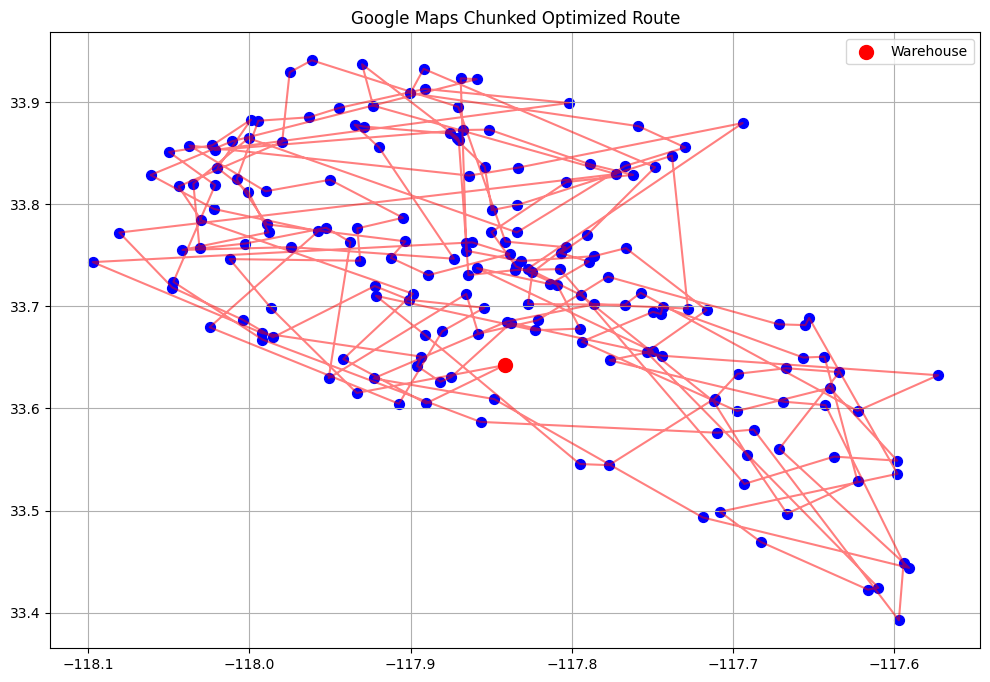

In [ ]:

def plot_route(route, title="Route"):
    """Plot the route on a scatter plot"""
    plt.figure(figsize=(12, 8))
    
    # Extract coordinates
    x_coords = [locations_mapping[str(i)]['longitude'] for i in route]
    y_coords = [locations_mapping[str(i)]['latitude'] for i in route]
    
    # Add warehouse return coordinates
    x_coords.append(locations_mapping['0']['longitude'])
    y_coords.append(locations_mapping['0']['latitude'])
    
    # Plot points and routes
    plt.scatter(x_coords, y_coords, c='blue', s=50)
    plt.plot(x_coords, y_coords, 'r-', alpha=0.5)
    
    # Highlight warehouse
    plt.scatter([x_coords[0]], [y_coords[0]], c='red', s=100, label='Warehouse')
    
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def get_google_benchmark_route_chunked():
    """Get optimized route from Google Maps Routes API using chunks"""
    import time  # Import time module inside function
    from datetime import datetime
    
    # Initialize Google Maps client
    gmaps = googlemaps.Client(key='NONE')
    
    try:
        MAX_WAYPOINTS = 23  # Using 23 to be safe (25 - origin - destination)
        n_locations = len(locations_mapping) - 1  # Excluding warehouse
        n_chunks = (n_locations + MAX_WAYPOINTS - 1) // MAX_WAYPOINTS  # Ceiling division
        
        print(f"Breaking {n_locations} locations into {n_chunks} chunks...")
        
        final_route = [0]  # Start with warehouse
        total_distance = 0
        
        # Process locations in chunks
        for chunk in range(n_chunks):
            start_idx = chunk * MAX_WAYPOINTS + 1  # +1 to skip warehouse
            end_idx = min((chunk + 1) * MAX_WAYPOINTS + 1, len(locations_mapping))
            
            print(f"\nProcessing chunk {chunk + 1}/{n_chunks} (locations {start_idx} to {end_idx-1})")
            
            # Create waypoints for this chunk
            waypoints = []
            for i in range(start_idx, end_idx):
                waypoint = f"{locations_mapping[str(i)]['latitude']},{locations_mapping[str(i)]['longitude']}"
                waypoints.append(waypoint)
            
            # Warehouse coordinates
            warehouse = f"{locations_mapping['0']['latitude']},{locations_mapping['0']['longitude']}"
            
            # If it's not the first chunk, use last location from previous chunk as origin
            origin = warehouse if chunk == 0 else f"{locations_mapping[str(final_route[-1])]['latitude']},{locations_mapping[str(final_route[-1])]['longitude']}"
            
            # If it's not the last chunk, don't return to warehouse yet
            destination = warehouse if chunk == n_chunks-1 else waypoints[-1]
            
            # Make API request for this chunk
            result = gmaps.directions(
                origin=origin,
                destination=destination,
                waypoints=waypoints[:-1] if chunk != n_chunks-1 else waypoints,  # Exclude last waypoint if it's destination
                optimize_waypoints=True,
                mode="driving"
            )
            
            if result:
                # Extract optimized route for this chunk
                waypoint_order = result[0]['waypoint_order']
                chunk_route = [start_idx + i for i in waypoint_order]
                
                # Add to final route
                if chunk == n_chunks-1:
                    final_route.extend(chunk_route)
                else:
                    final_route.extend(chunk_route[:-1])  # Exclude last point as it'll be origin of next chunk
                
                # Add distances
                chunk_distance = sum(leg['distance']['value'] for leg in result[0]['legs'])
                total_distance += chunk_distance
                
                print(f"Chunk {chunk + 1} processed: {len(chunk_route)} locations, {chunk_distance/1000:.2f} km")
            
            # Sleep briefly to avoid hitting API rate limits
            time.sleep(1)
        
        # Save benchmark data
        benchmark_data = {
            'route': final_route,
            'distance': total_distance,
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            'num_chunks': n_chunks
        }
        
        # Save to file
        with open('google_benchmark.json', 'w') as f:
            json.dump(benchmark_data, f)
        
        print(f"\nFinal Results:")
        print(f"Total Distance: {total_distance/1000:.2f} km")
        print(f"Number of stops: {len(final_route)}")
        
        # Plot the route
        plot_route(final_route, "Google Maps Chunked Optimized Route")
        
        return benchmark_data
            
    except Exception as e:
        print(f"Error calling Google Maps API: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Run the chunked version
benchmark_data = get_google_benchmark_route_chunked()

---
## Google OR Tools Solution.

Distance matrix shape: (201, 201)
Number of locations: 201

OR-Tools Solution:
Computation time: 30.00 seconds
Total distance: 692.33 km
Number of stops: 202


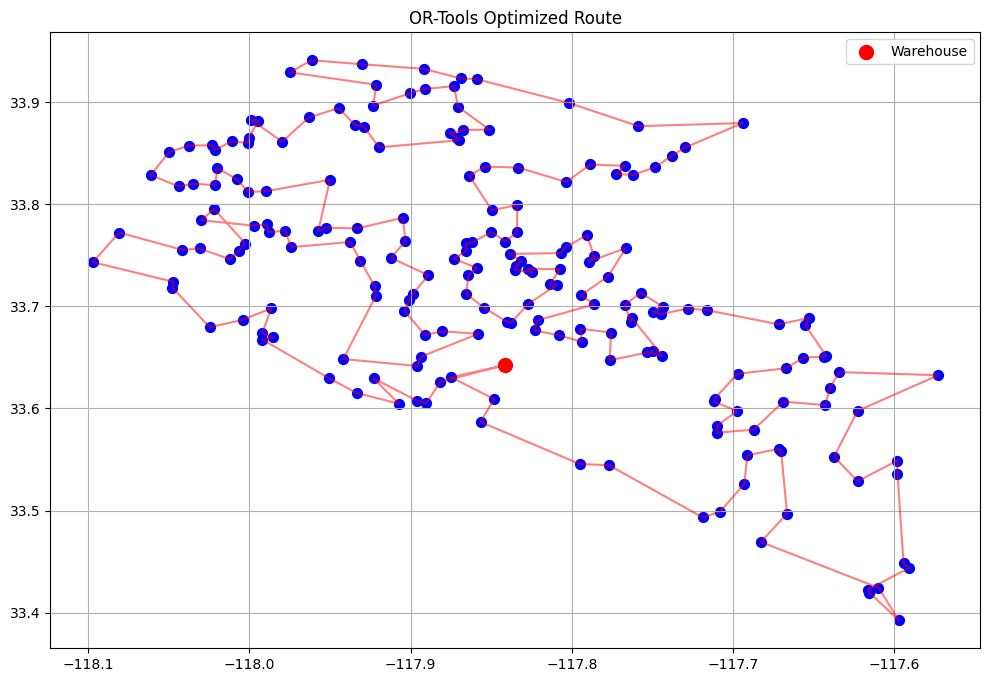

In [2]:
# Cell 1: Setup and Imports
import numpy as np
import json
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import matplotlib.pyplot as plt
from time import time
from datetime import datetime

# Cell 2: Load Data
# Load distance matrix
distance_matrix = np.load('distance_matrix.npy')
print(f"Distance matrix shape: {distance_matrix.shape}")

# Load locations mapping
with open('locations_mapping.json', 'r') as f:
    locations_mapping = json.load(f)
print(f"Number of locations: {len(locations_mapping)}")

# Cell 3: OR-Tools Implementation
def create_data_model():
    """Creates the data model for OR-Tools"""
    data = {}
    # Convert distances to integers (OR-Tools requirement)
    # Multiply by 1 to convert to meters for better precision
    data['distance_matrix'] = (distance_matrix * 1).astype(int)
    data['num_vehicles'] = 1  # Single route TSP
    data['depot'] = 0  # Warehouse is at index 0
    return data

def solve_tsp_ortools():
    """Solve TSP using OR-Tools"""
    # Create the data model
    data = create_data_model()
    
    # Create the routing index manager
    manager = pywrapcp.RoutingIndexManager(
        len(data['distance_matrix']),
        data['num_vehicles'],
        data['depot']
    )
    
    # Create Routing Model
    routing = pywrapcp.RoutingModel(manager)
    
    # Create and register a transit callback
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    
    # Define cost of each arc
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    
    # Setting first solution strategy
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    
    # Set metaheuristic settings for better solutions
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
    search_parameters.time_limit.FromSeconds(30)  # Allow 30 seconds for solving
    
    # Solve the problem
    start_time = time()
    solution = routing.SolveWithParameters(search_parameters)
    end_time = time()
    
    if solution:
        # Extract the route
        route = []
        index = routing.Start(0)  # Start at warehouse
        while not routing.IsEnd(index):
            route.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        route.append(manager.IndexToNode(index))  # Add warehouse at the end
        
        # Calculate total distance
        total_distance = solution.ObjectiveValue()
        
        print(f"\nOR-Tools Solution:")
        print(f"Computation time: {end_time - start_time:.2f} seconds")
        print(f"Total distance: {total_distance/1000:.2f} km")
        print(f"Number of stops: {len(route)}")
        
        return route, total_distance
    else:
        print("No solution found!")
        return None, None

def plot_route(route, title="Route"):
    """Plot the route on a scatter plot"""
    plt.figure(figsize=(12, 8))
    
    # Extract coordinates
    x_coords = [locations_mapping[str(i)]['longitude'] for i in route]
    y_coords = [locations_mapping[str(i)]['latitude'] for i in route]
    
    # Add warehouse return coordinates
    x_coords.append(locations_mapping['0']['longitude'])
    y_coords.append(locations_mapping['0']['latitude'])
    
    # Plot points and routes
    plt.scatter(x_coords, y_coords, c='blue', s=50)
    plt.plot(x_coords, y_coords, 'r-', alpha=0.5)
    
    # Highlight warehouse
    plt.scatter([x_coords[0]], [y_coords[0]], c='red', s=100, label='Warehouse')
    
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Cell 4: Run OR-Tools and Save Results
# Solve using OR-Tools
route, total_distance = solve_tsp_ortools()

if route:
    # Save results
    ortools_data = {
        'route': route,
        'distance': float(total_distance),  # Convert from numpy type
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    with open('ortools_solution.json', 'w') as f:
        json.dump(ortools_data, f)
    
    # Plot the route
    plot_route(route, "OR-Tools Optimized Route")